In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib as mpl

In [3]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:
import matplotlib.font_manager as fm

In [5]:
file="/content/drive/MyDrive/4조  일반/indeed_job_dataset_ver03.csv"

In [6]:
indeed=pd.read_csv(file, encoding='utf8')
indeed.head()

,index,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Description,Location,Company_Revenue,Company_Employees,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,...,MA,MD,MI,MN,MO,MT,NC,ND,NE,NH,NM,NJ,NY,NV,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Degree.1,m,p,both
0,0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,"[<p><b>POSITION SUMMARY</b></p>, <p>The Busine...",MO,More than $10B (USD),"10,000+",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,M,1,0,0
1,1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,"[<p><b>What do we need?</b></p>, <ul><li>You t...",TX,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,P,0,1,0
2,2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,"[<ul><li>Validate, analyze, and conduct statis...",OR,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0
3,3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,na,0,0,0
4,4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,[<ul><li>Assist in consultations with business...,TX,0,"Less than 10,000",0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,na,0,0,0


In [7]:
indeed.columns

Index(['index', 'Job_Title', 'Queried_Salary', 'Job_Type', 'Skill',
       'No_of_Skills', 'Company', 'Description', 'Location', 'Company_Revenue',
       ...
       'Consulting and Business Services', 'Internet and Software',
       'Banks and Financial Services', 'Health Care', 'Insurance',
       'Other_industries', 'Degree.1', 'm', 'p', 'both'],
      dtype='object', length=101)

In [8]:
indeed_STA=indeed.groupby("Location")
indeed_STA

In [9]:
STA_count=indeed_STA.count()
STA_count.head()

,index,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Description,Company_Revenue,Company_Employees,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,...,MA,MD,MI,MN,MO,MT,NC,ND,NE,NH,NM,NJ,NY,NV,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Degree.1,m,p,both
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
AL,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
AR,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
AZ,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
CA,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,...,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395


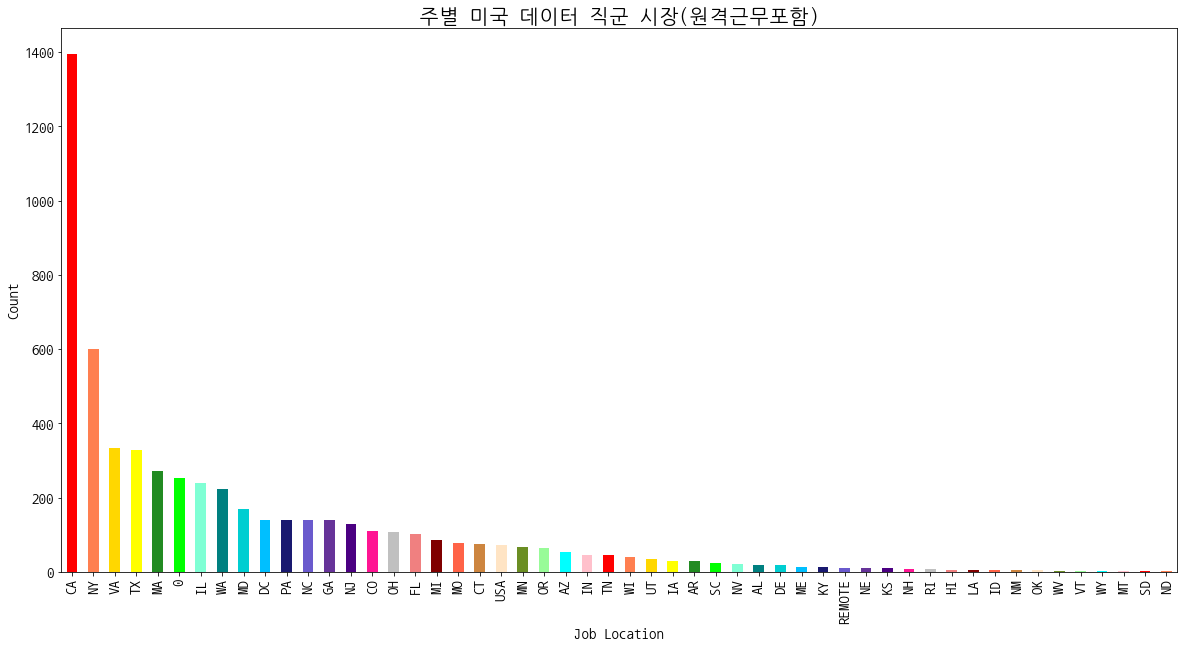

In [125]:
plt.figure(figsize=(20,10))
ax=STA_count["Job_Title"].sort_values(ascending=False).plot(kind="bar",color=['red', 'coral', 'gold', 'yellow', 'forestgreen',
                                                                             "lime",'aquamarine','teal','darkturquoise','deepskyblue',
                                                                             'midnightblue','slateblue','rebeccapurple','indigo','deeppink',
                                                                             'silver','lightcoral','maroon','tomato',"peru",
                                                                             'bisque','olivedrab','palegreen',"cyan","pink"])
#plt.tight_layout()
plt.title("주별 미국 데이터 직군 시장(원격근무포함)",fontsize=20)
plt.xlabel("Job Location",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

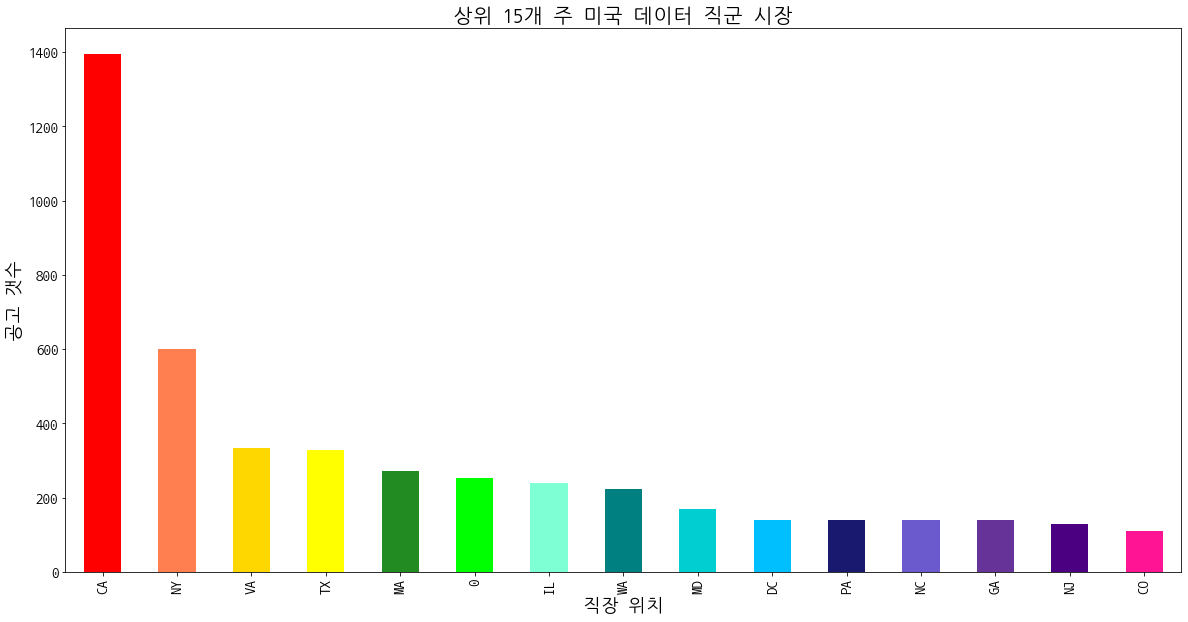

In [126]:
plt.figure(figsize=(20,10))
ax1=STA_count["Job_Title"].sort_values(ascending=False).head(15).plot(kind="bar",color=['red', 'coral', 'gold', 'yellow', 'forestgreen',
                                                                             "lime",'aquamarine','teal','darkturquoise','deepskyblue',
                                                                             'midnightblue','slateblue','rebeccapurple','indigo','deeppink'])
plt.title("상위 15개 주 미국 데이터 직군 시장",fontsize=20)
plt.xlabel("직장 위치",fontsize=18)
plt.ylabel("공고 갯수",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [15]:
job_count=pd.DataFrame(STA_count["Job_Title"].sort_values(ascending=False))
job_count.head(20)

,Job_Title
Location,
CA,1395
NY,601
VA,334
TX,329
MA,271
0,252
IL,240
WA,222
MD,169


In [16]:
job_series = indeed.groupby('Location')["Job_Type"].count()
job_df = pd.DataFrame((job_series).sort_values(ascending = True))
job_df.head()
job_df1 = job_df.reset_index(inplace = False)
job_df1.head()

,Location,Job_Type
0,MT,1
1,SD,1
2,ND,1
3,VT,2
4,WY,2


In [17]:
job_series = indeed.groupby('Location')['Job_Type'].count()
job_df = pd.DataFrame(job_series)
job_df.reset_index(inplace = True)
job_df['Job_Type'].sort_values(ascending=True)

#https://wellsr.com/python/creating-python-choropleth-maps-with-plotly/
#   (pip install plotly_express)  실행해줄것
import plotly.express as px  # express 임포트 해줄것
fig = px.choropleth(job_df,  # 판다스 데이터 프레임 입력
                   locations='Location',  # 컬럼과 위치 데이터 프레임
                   color='Job_Type',  # 컬럼과 컬러변수 데이터 프레임
                   hover_name='Job_Type', # 컬럼 hover 정보 데이터 프레임
                   locationmode = 'USA-states',
                   color_continuous_scale='YlOrRd'
                   )
                  #color_continuous_scale=px.colors.diverging.RdYlGn[::-1]) # 플롯 미국으로 설정
fig.update_layout(
   title_text = '미국의 데이터 직군직무 분포', # 제목 생성
   geo_scope='usa',  # 글로벌에서 미국 지도만 플롯팅
)
fig.show()  # 지도출력

In [18]:
indeed_STATE=indeed.set_index(["Location"])

In [19]:
# 데이터 전처리: Queryed_Salary 컬럼에서 연산자와 제거 및 연봉 평균 신규변수로 연봉 컬럼 신규 추가
indeed_STATE["Salary"]=indeed_STATE["Queried_Salary"].str.replace("<","")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace(">","")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("80000-99999","84999")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("100000-119999","109999")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("120000-139999","129999")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("140000-159999","149999")
indeed_STATE

,index,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Description,Company_Revenue,Company_Employees,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,...,MD,MI,MN,MO,MT,NC,ND,NE,NH,NM,NJ,NY,NV,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Degree.1,m,p,both,Salary
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MO,0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,"[<p><b>POSITION SUMMARY</b></p>, <p>The Busine...",More than $10B (USD),"10,000+",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,M,1,0,0,80000
TX,1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,"[<p><b>What do we need?</b></p>, <ul><li>You t...",0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,P,0,1,0,80000
OR,2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,"[<ul><li>Validate, analyze, and conduct statis...",0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0,80000
DC,3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,"[<p>Full time</p>, <p>Washington, DC metro are...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,na,0,0,0,80000
TX,4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,[<ul><li>Assist in consultations with business...,0,"Less than 10,000",0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,na,0,0,0,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,na,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0,160000
CA,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,[<p>Want to change the world? How about contri...,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,na,0,0,0,160000
DE,5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,[<ul><li>Identify and solve hybrid cloud data ...,More than $10B (USD),"10,000+",0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,na,0,0,0,160000


In [20]:
indeed_STATE["Queried_Salary"].value_counts()

100000-119999    1394
120000-139999    1292
80000-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

In [21]:
indeed_STATE["Queried_Salary"].value_counts()

100000-119999    1394
120000-139999    1292
80000-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

In [22]:
# 연봉변수 int 변경 및 평균 변수 지정
indeed_STATE["Salary"]=indeed_STATE["Salary"].astype(int)
state_avg_salary=indeed_STATE.groupby("Location").mean().round(2)["Salary"].sort_values(ascending=False)
state_salary=pd.DataFrame(state_avg_salary)
state_salary.head(20)

,Salary
Location,
CA,128017.13
0,124443.52
NY,123618.27
VA,117544.05
WA,117499.16
DE,117057.94
USA,115914.63
NJ,115233.62
MA,114242.78


In [23]:
# 직업/직무 유형(파이 차트)
count_of_jobstypes=indeed['Job_Type'].value_counts()
count_of_jobstypes_df=pd.DataFrame(count_of_jobstypes)

#count_of_jobstypes_df.index.name="JobType"
count_of_jobstypes_df

,Job_Type
data_scientist,2543
data_analyst,1793
data_engineer,1379


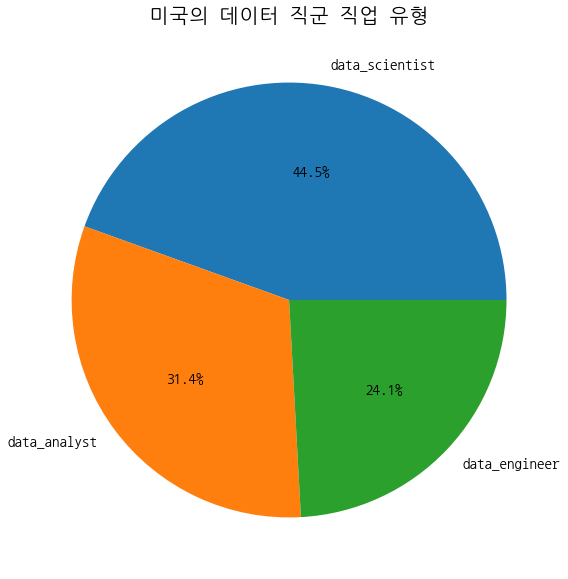

In [142]:
plt.figure(figsize=(10, 10))
plt.pie(count_of_jobstypes_df['Job_Type'],labels=count_of_jobstypes_df.index,autopct="%1.1f%%")
plt.title("미국의 데이터 직군 직업 유형", fontsize=20)
plt.rcParams['font.size'] = 15
plt.show()

In [36]:
#상위 10개 기업(막대 차트)
count_of_company=indeed['Company'].value_counts().drop('na')
count_of_company_df=pd.DataFrame(count_of_company)
new_company_count_df=count_of_company_df.head(10)
new_company_count_df

,Company
Booz Allen Hamilton,151
Harnham,87
Capgemini,84
Facebook,65
KPMG LLP,64
Walmart,59
Capital One,54
JPMorgan Chase,51
Google,40
IBM,38


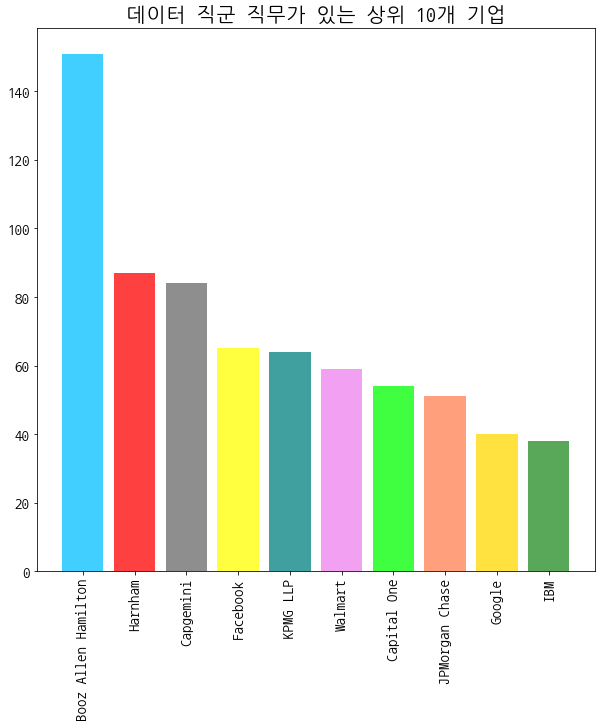

In [139]:
#1234
plt.figure(figsize=(10, 10))
x_axis=np.arange(len(new_company_count_df))
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,new_company_count_df.index, rotation=90)
plt.title("데이터 직군 직무가 있는 상위 10개 기업",fontsize="20")
plt.bar(x_axis,new_company_count_df['Company'],alpha=0.75,align="center",
        color=['deepskyblue','red','dimgray','yellow','teal','violet',"lime",
                'coral', 'gold',  'forestgreen',
                                                                             ])

plt.show()

In [38]:
company_indus_series =indeed['Company_Industry'].value_counts()
company_indus_df = pd.DataFrame(company_indus_series)
company_indus_df.index.name= 'Industry Name'
company_indus_df
new_index_indus = company_indus_df.reset_index()
industry_df = new_index_indus.rename(columns={'Company_Industry':'Available Jobs'})
industry_df

,Industry Name,Available Jobs
0,na,1889
1,Consulting and Business Services,733
2,Internet and Software,647
3,Banks and Financial Services,459
4,Health Care,339
5,Insurance,227
6,Industrial Manufacturing,153
7,Aerospace and Defense,129
8,Retail,122
9,Education and Schools,121


In [39]:
industry_df.head(10)

,Industry Name,Available Jobs
0,na,1889
1,Consulting and Business Services,733
2,Internet and Software,647
3,Banks and Financial Services,459
4,Health Care,339
5,Insurance,227
6,Industrial Manufacturing,153
7,Aerospace and Defense,129
8,Retail,122
9,Education and Schools,121


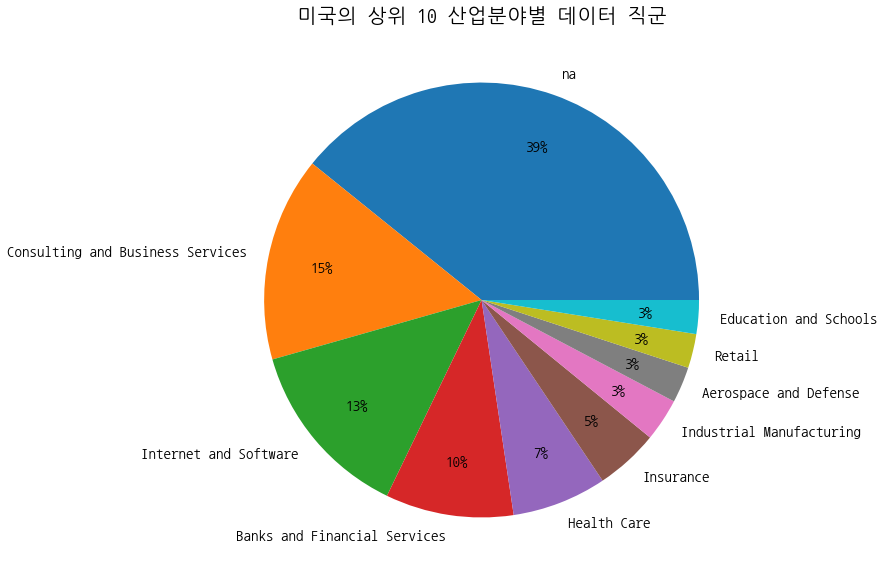

In [41]:
industry_df =industry_df.head(10)
industry_df
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('미국의 상위 10 산업분야별 데이터 직군',fontsize="20")
plt.pie(industry_df['Available Jobs'] , autopct = '%0.f%%',pctdistance=0.75,textprops={'fontsize': 15},
       labels = industry_df['Industry Name']);
plt.rcParams['font.size'] = 15

In [42]:
indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql', 'aws', 'excel',
       'ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink', 'mongo', 'google_an']]
indeed_salary.head()

,Queried_Salary,Job_Type,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
0,<80000,data_scientist,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,<80000,data_scientist,5,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0
2,<80000,data_scientist,9,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,<80000,data_scientist,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,<80000,data_scientist,7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [43]:
indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql', 'aws', 'excel',
       'ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink','mongo', 'google_an']]

data_ana=indeed_salary[indeed_salary["Job_Type"]=="data_analyst"].drop("Queried_Salary",axis=1)
data_ana.head()

,Job_Type,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
2543,data_analyst,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2544,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2545,data_analyst,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2546,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2547,data_analyst,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
data_eng=indeed_salary[indeed_salary["Job_Type"]=="data_engineer"].drop("Queried_Salary",axis=1)
data_eng.head()

,Job_Type,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
4336,data_engineer,5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4337,data_engineer,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
4338,data_engineer,2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
4339,data_engineer,9,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4340,data_engineer,3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [45]:
data_sci=indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql', 'aws', 'excel',
       'ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink', 'mongo', 'google_an']]

data_ana=indeed_salary[indeed_salary["Job_Type"]=="data_analyst"].drop("Queried_Salary",axis=1)
data_ana.head()

,Job_Type,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
2543,data_analyst,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2544,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2545,data_analyst,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2546,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2547,data_analyst,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
data_sci=indeed_salary[indeed_salary["Job_Type"]=="data_scientist"].drop("Queried_Salary",axis=1)
data_sci.head()

,Job_Type,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
0,data_scientist,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,data_scientist,5,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0
2,data_scientist,9,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,data_scientist,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,data_scientist,7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [47]:
jobs_df = indeed.set_index('Job_Type')
jobs_df_skill = jobs_df.loc[['data_scientist','data_engineer','data_analyst'],
                            ['python', 'sql', 'aws',  'excel','ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink', 'mongo', 'google_an']]
jobs_groups = jobs_df_skill.groupby('Job_Type')
jobs_groups.sum()

,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
Job_Type,,,,,,,,,,,,,,,
data_analyst,512,1044,132,991,166,456,126,538,310,67,101,138,2,11,76
data_engineer,901,867,558,452,289,228,761,214,67,719,704,700,70,168,30
data_scientist,1912,1193,355,933,1842,1550,827,484,564,745,675,547,7,99,27


In [48]:
print ("데이터 분석가 상위 4개 기술역량")
print("----------------------------------")
print(f'SQL): {sum(data_ana["sql"]==1)}')
print(f'Tableau): {sum(data_ana["tableau"]==1)}')
print(f'Python): {sum(data_ana["python"]==1)}')
print(f'R): {sum(data_ana["r"]==1)}')
print("")
print("데이터 분석가 추가 기술역량")
print("------------------------------------")
print(f'SAS): {sum(data_ana["sas"]==1)}')
print(f'Scala): {sum(data_ana["scala"]==1)}')
print(f'AWS): {sum(data_ana["aws"]==1)}')
print(f'Hadoop): {sum(data_ana["hadoop"]==1)}')
print(f'Java): {sum(data_ana["java"]==1)}')
print(f'ML): {sum(data_ana["ML"]==1)}')
print(f'Google An): {sum(data_ana["google_an"]==1)}')
print(f'Spark): {sum(data_ana["spark"]==1)}')
print(f'Mongo): {sum(data_ana["mongo"]==1)}')
print(f'Flink): {sum(data_ana["flink"]==1)}')

데이터 분석가 상위 4개 기술역량
----------------------------------
SQL): 1044
Tableau): 538
Python): 512
R): 456

데이터 분석가 추가 기술역량
------------------------------------
SAS): 310
Scala): 138
AWS): 132
Hadoop): 126
Java): 101
ML): 166
Google An): 76
Spark): 67
Mongo): 11
Flink): 2


In [49]:
print ("데이터 엔지니어 상위 4개 기술역량")
print("----------------------------------")
print(f'Python): {sum(data_eng["python"]==1)}')
print(f'SQL): {sum(data_eng["sql"]==1)}')
print(f'Hadoop): {sum(data_eng["hadoop"]==1)}')
print(f'Spark): {sum(data_eng["spark"]==1)}')
print("")
print("데이터 엔지니어 추가 기술역량")
print("------------------------------------")
print(f'Java): {sum(data_eng["java"]==1)}')
print(f'Scala): {sum(data_eng["scala"]==1)}')
print(f'AWS): {sum(data_eng["aws"]==1)}')
print(f'ML): {sum(data_eng["ML"]==1)}')
print(f'R): {sum(data_eng["r"]==1)}')
print(f'Tableau): {sum(data_eng["tableau"]==1)}')
print(f'Mongo): {sum(data_eng["mongo"]==1)}')
print(f'Flink): {sum(data_eng["flink"]==1)}')
print(f'SAS): {sum(data_eng["sas"]==1)}')
print(f'Google An): {sum(data_eng["google_an"]==1)}')



데이터 엔지니어 상위 4개 기술역량
----------------------------------
Python): 901
SQL): 867
Hadoop): 761
Spark): 719

데이터 엔지니어 추가 기술역량
------------------------------------
Java): 704
Scala): 700
AWS): 558
ML): 289
R): 228
Tableau): 214
Mongo): 168
Flink): 70
SAS): 67
Google An): 30


In [50]:
print ("데이터 과학자 상위 4개 기술역량")
print("----------------------------------")
print(f'Python): {sum(data_sci["python"]==1)}')
print(f'ML): {sum(data_sci["ML"]==1)}')
print(f'R): {sum(data_sci["r"]==1)}')
print(f'SQL): {sum(data_sci["sql"]==1)}')
print("")
print("데이터 과학자 추가 기술역량")
print("------------------------------------")
print(f'Hadoop): {sum(data_sci["hadoop"]==1)}')
print(f'Spark): {sum(data_sci["spark"]==1)}')
print(f'Java): {sum(data_sci["java"]==1)}')
print(f'SAS): {sum(data_sci["sas"]==1)}')
print(f'Scala): {sum(data_sci["scala"]==1)}')
print(f'Tableau): {sum(data_sci["tableau"]==1)}')
print(f'AWS): {sum(data_sci["aws"]==1)}')
print(f'Mongo): {sum(data_sci["mongo"]==1)}')
print(f'Google An): {sum(data_sci["google_an"]==1)}')
print(f'Flink): {sum(data_sci["flink"]==1)}')

데이터 과학자 상위 4개 기술역량
----------------------------------
Python): 1912
ML): 1842
R): 1550
SQL): 1193

데이터 과학자 추가 기술역량
------------------------------------
Hadoop): 827
Spark): 745
Java): 675
SAS): 564
Scala): 547
Tableau): 484
AWS): 355
Mongo): 99
Google An): 27
Flink): 7


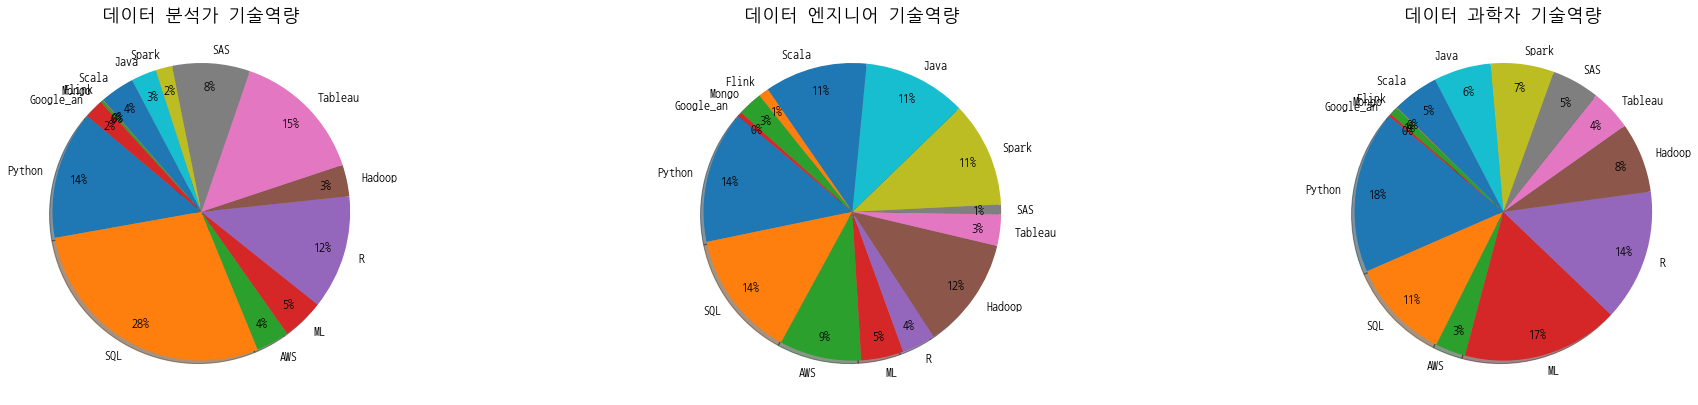

In [127]:
fig, axes = plt.subplots(1, 3,figsize=(30, 20))
labels1=['Python', 'SQL', 'AWS', 'ML', 'R', 'Hadoop', 'Tableau', 'SAS', 'Spark', 'Java', 'Scala', 'Flink', 'Mongo', 'Google_an']
sizes1 =[512,1044,132, 166, 456, 126, 538, 310, 67, 101, 138, 2, 11, 76]
sizes2 =[901,867,558, 289, 228, 761, 214, 67, 719, 704, 700, 70, 168, 30]
sizes3= [1912, 1193, 355, 1842, 1550, 827, 484, 564, 745, 675, 547, 7, 99, 27]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('데이터 분석가 기술역량')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                   shadow=True,pctdistance=0.85,startangle=140)
axes[1].set_title('데이터 엔지니어 기술역량')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('데이터 과학자 기술역량')
fig.subplots_adjust(wspace=0.75)


In [55]:
jobs_groups.sum()

,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
Job_Type,,,,,,,,,,,,,,,
data_analyst,512,1044,132,991,166,456,126,538,310,67,101,138,2,11,76
data_engineer,901,867,558,452,289,228,761,214,67,719,704,700,70,168,30
data_scientist,1912,1193,355,933,1842,1550,827,484,564,745,675,547,7,99,27


In [56]:
temp = jobs_groups.sum()

In [57]:
temp.iloc[0, :].values.astype(int)

array([ 512, 1044,  132,  991,  166,  456,  126,  538,  310,   67,  101,
        138,    2,   11,   76])

In [58]:
temp.iloc[1, :].values.astype(int)

array([901, 867, 558, 452, 289, 228, 761, 214,  67, 719, 704, 700,  70,
       168,  30])

In [59]:
temp.iloc[2, :].values.astype(int)

array([1912, 1193,  355,  933, 1842, 1550,  827,  484,  564,  745,  675,
        547,    7,   99,   27])

In [60]:
# 데이터프레임 생성 / 신입: (<80000-99999), 중급 :(100000-139999), 고급: (140000->160000)
 
indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql', 'aws',  'excel','ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink', 'mongo', 'google_an']]

entry_level=indeed_salary[indeed_salary["Queried_Salary"]=="<80000"]
entry_level=entry_level.append(indeed_salary[indeed_salary["Queried_Salary"]=="80000-99999"])
entry_level=entry_level.drop("Job_Type",axis=1)


mid_level=indeed_salary[indeed_salary["Queried_Salary"]=="100000-119999"]
mid_level=mid_level.append(indeed_salary[indeed_salary["Queried_Salary"]=="120000-139999"])
mid_level=mid_level.drop("Job_Type",axis=1)

senior_level=indeed_salary[indeed_salary["Queried_Salary"]==">160000"]
senior_level=senior_level.append(indeed_salary[indeed_salary["Queried_Salary"]=="140000-159999"])
senior_level=senior_level.drop("Job_Type",axis=1)

In [61]:
entry_level.head()

,Queried_Salary,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
0,<80000,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,<80000,5,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0
2,<80000,9,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,<80000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,<80000,7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [62]:
mid_level.head()

,Queried_Salary,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
281,100000-119999,9,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0
282,100000-119999,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
283,100000-119999,11,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0
284,100000-119999,6,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
285,100000-119999,4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [63]:
senior_level.head()

,Queried_Salary,No_of_Skills,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
2312,>160000,8,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
2313,>160000,11,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0
2314,>160000,13,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0
2315,>160000,18,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0
2316,>160000,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [64]:
#연봉 그룹화하여 각 연봉 수준에 대한 기술 합계 결정
#신입: (<80000-99999), 중급 :(100000-139999), 고급: (140000->160000)

salary_df = indeed.set_index('Queried_Salary')
salary_df_skill = salary_df.loc[['<80000','80000-99999','100000-119999','120000-139999',
'140000-159999','>160000'],['python', 'sql', 'aws',  'excel','ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink', 'mongo', 'google_an']]
salary_groups = salary_df_skill.groupby('Queried_Salary')
salary_groups.sum()


#연봉별 요구 기술역량 데이터 프레임 생성
salary = indeed.set_index('Queried_Salary')
salary_skill_df= salary.loc[['<80000','80000-99999', '100000-119999','120000-139999','140000-159999','>160000'],
          ['python', 'sql', 'aws', 'ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink', 'mongo', 'google_an']]
salary_groups = salary_skill_df.groupby('Queried_Salary')

skills_salary_df = pd.DataFrame({'Queried_Salary':['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
                               'python':['144','412','861','957','674','277'], 
                               'sql':['367','618','840','720','388','171'],
                               'aws':['41','117','245','320','224','98'],
                               'ML':['67','201','579','687','533','230'],
                               'r':['48','311','648','601','376','150'],
                               'hadoop':['12','97','410','593','424','178'],
                               'tableau':['162','223','357','253','138','43'],
                               'sas':['131','156','288','189','124','53'], 
                               'spark':['9','71','347','536','397','171'],
                               'java':['34','102','375','474','359','136'],
                               'scala':['47','88','314','451','322','163',],
                               'flink':['0','1','25','27','19','7'],
                               'mongo':['3','20','88','91','61','15'],
                               'google_an':['28','37','33','23','6','6']}
                              )
skills_salary_df=skills_salary_df.set_index("Queried_Salary")
skills_salary_df

,python,sql,aws,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
Queried_Salary,,,,,,,,,,,,,,
<80000,144,367,41,67,48,12,162,131,9,34,47,0,3,28
80000-99999,412,618,117,201,311,97,223,156,71,102,88,1,20,37
100000-119999,861,840,245,579,648,410,357,288,347,375,314,25,88,33
120000-139999,957,720,320,687,601,593,253,189,536,474,451,27,91,23
140000-159999,674,388,224,533,376,424,138,124,397,359,322,19,61,6
>160000,277,171,98,230,150,178,43,53,171,136,163,7,15,6


In [65]:
top_skill_jobs = pd.DataFrame({'Job Level':['Entry Level','Mid Level','Senior Level'],
                               'python':[556,1818,951],
                               'sql':[985,1560,559],
                               'aws':[158,565,322],
                               'ML':[268,1266,763],
                               'r':[459,1249,526],
                               'hadoop':[109,1003,602],
                               'tableau':[445,610,181],
                               'sas':[287,477,177],
                               'spark':[80,883,568],
                               'java':[136,849,495],
                               'scala':[135,765,485],
                               'flink':[1,52,26],
                               'mongo':[23,179,76],
                               'google_an':[65,56,12] }
                              )
top_skill_jobs=top_skill_jobs.set_index("Job Level")
top_skill_jobs

,python,sql,aws,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
Job Level,,,,,,,,,,,,,,
Entry Level,556,985,158,268,459,109,445,287,80,136,135,1,23,65
Mid Level,1818,1560,565,1266,1249,1003,610,477,883,849,765,52,179,56
Senior Level,951,559,322,763,526,602,181,177,568,495,485,26,76,12


In [66]:
print ("초급연봉 수준 상위 4개 기술역량")
print("---------------------------------------")
print(f'SQL): {sum(entry_level["sql"]==1)}')
print(f'Python): {sum(entry_level["python"]==1)}')
print(f'R): {sum(entry_level["r"]==1)}')
print(f'Tableau): {sum(entry_level["tableau"]==1)}')
print("")
print("초급연봉 수준 추가 기술역량")
print("-----------------------------------------")
print(f'SAS): {sum(entry_level["sas"]==1)}')
print(f'ML): {sum(entry_level["ML"]==1)}')
print(f'Aws): {sum(entry_level["aws"]==1)}')
print(f'Java): {sum(entry_level["java"]==1)}')
print(f'Scala): {sum(entry_level["scala"]==1)}')
print(f'Hadoop): {sum(entry_level["hadoop"]==1)}')
print(f'Spark): {sum(entry_level["spark"]==1)}')
print(f'Google An): {sum(entry_level["google_an"]==1)}')
print(f'Mongo): {sum(entry_level["mongo"]==1)}')
print(f'Flink): {sum(entry_level["flink"]==1)}')

초급연봉 수준 상위 4개 기술역량
---------------------------------------
SQL): 985
Python): 556
R): 459
Tableau): 445

초급연봉 수준 추가 기술역량
-----------------------------------------
SAS): 287
ML): 268
Aws): 158
Java): 136
Scala): 135
Hadoop): 109
Spark): 80
Google An): 65
Mongo): 23
Flink): 1


In [67]:
print ("중급연봉 수준 상위 4개 기술역량")
print("-------------------------------------")
print(f'Python): {sum(mid_level["python"]==1)}')
print(f'SQL): {sum(mid_level["sql"]==1)}')
print(f'ML): {sum(mid_level["ML"]==1)}')
print(f'R): {sum(mid_level["r"]==1)}')
print("")
print("중급연봉 수준 추가 기술역량")
print("--------------------------------------")
print(f'Hadoop): {sum(mid_level["hadoop"]==1)}')
print(f'Spark): {sum(mid_level["spark"]==1)}')
print(f'Java): {sum(mid_level["java"]==1)}')
print(f'Scala): {sum(mid_level["scala"]==1)}')
print(f'Tableau): {sum(mid_level["tableau"]==1)}')
print(f'Aws): {sum(mid_level["aws"]==1)}')
print(f'SAS): {sum(mid_level["sas"]==1)}')
print(f'Mongo): {sum(mid_level["mongo"]==1)}')
print(f'Google An): {sum(mid_level["google_an"]==1)}')
print(f'Flink): {sum(mid_level["flink"]==1)}')

중급연봉 수준 상위 4개 기술역량
-------------------------------------
Python): 1818
SQL): 1560
ML): 1266
R): 1249

중급연봉 수준 추가 기술역량
--------------------------------------
Hadoop): 1003
Spark): 883
Java): 849
Scala): 765
Tableau): 610
Aws): 565
SAS): 477
Mongo): 179
Google An): 56
Flink): 52


In [68]:
print ("고급연봉 수준 상위 4개 기술역량")
print("----------------------------------------")
print(f'Python): {sum(senior_level["python"]==1)}')
print(f'ML): {sum(senior_level["ML"]==1)}')
print(f'Hadoop): {sum(senior_level["hadoop"]==1)}')
print(f'Spark): {sum(senior_level["spark"]==1)}')
print("")
print("고급연봉 수준 추가 기술역량")
print("-----------------------------------------")
print(f'SQL): {sum(senior_level["sql"]==1)}')
print(f'R): {sum(senior_level["r"]==1)}')
print(f'Java): {sum(senior_level["java"]==1)}')
print(f'Scala): {sum(senior_level["scala"]==1)}')
print(f'Aws): {sum(senior_level["aws"]==1)}')
print(f'Tableau): {sum(senior_level["tableau"]==1)}')
print(f'SAS): {sum(senior_level["sas"]==1)}')
print(f'Mongo): {sum(senior_level["mongo"]==1)}')
print(f'Flink): {sum(senior_level["flink"]==1)}')
print(f'Google An): {sum(senior_level["google_an"]==1)}')

고급연봉 수준 상위 4개 기술역량
----------------------------------------
Python): 951
ML): 763
Hadoop): 602
Spark): 568

고급연봉 수준 추가 기술역량
-----------------------------------------
SQL): 559
R): 526
Java): 495
Scala): 485
Aws): 322
Tableau): 181
SAS): 177
Mongo): 76
Flink): 26
Google An): 12


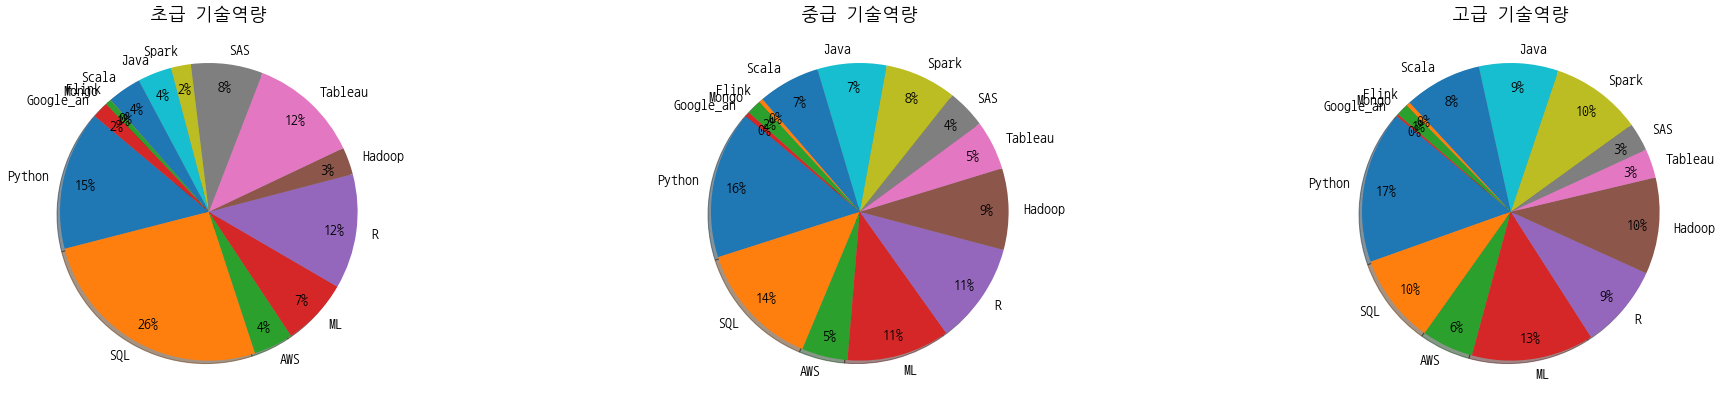

In [128]:
fig, axes = plt.subplots(1, 3,figsize=(30, 20))
labels1=['Python', 'SQL', 'AWS', 'ML', 'R', 'Hadoop', 'Tableau', 'SAS', 'Spark', 'Java', 'Scala', 'Flink', 'Mongo', 'Google_an']
sizes1 =[556,958,158,268,459,109,445,287,80,136,135,1,23,65]
sizes2 =[1818,1560,565,1266,1249,1003,610,477,883,849,765,52,179,56]
sizes3= [951,559,322,763,526,602,181,177,568,495,485,26,76,12]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('초급 기술역량')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                   shadow=True,pctdistance=0.85,startangle=140 )
axes[1].set_title('중급 기술역량')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('고급 기술역량')
fig.subplots_adjust(wspace=0.75)

In [74]:
salary = indeed.set_index('Queried_Salary')
salary_skill_df= salary.loc[['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
          ['Job_Type']]
salary_skill_df
jobtype_groups = salary_skill_df.groupby('Queried_Salary')
job_type_df= jobtype_groups['Job_Type'].value_counts()
df = pd.DataFrame(job_type_df)
#df.reorder_levels(0,("<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"))
df.sort_index(ascending = False)

Job_Type
Queried_Salary Job_Type                
>160000        data_scientist       231
               data_engineer        104
               data_analyst          80
<80000         data_scientist        48
               data_engineer         27
               data_analyst         713
80000-99999    data_scientist       233
               data_engineer        125
               data_analyst         595
140000-159999  data_scientist       551
               data_engineer        275
               data_analyst          47
120000-139999  data_scientist       770
               data_engineer        452
               data_analyst          70
100000-119999  data_scientist       710
               data_engineer        396
               data_analyst         288

In [75]:
salary = indeed.set_index('Queried_Salary')
salary_skill_df= salary.loc[['<80000','80000-99999', '100000-119999','120000-139999','140000-159999','>160000'],
          ['python', 'sql', 'aws', 'ML', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'scala', 'flink', 'mongo', 'google_an']]
salary_groups = salary_skill_df.groupby('Queried_Salary')
sum_salary = salary_groups.sum()
sum_salary['Total Count of Skills']= sum_salary.sum(axis=1)
sum_salary
skills_salary_df = pd.DataFrame({'Queried_Salary':['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
                               'python':['144','412','861','957','674','277'],
                               'sql':['367','618','840','720','388','171'],
                               'aws':['41','117','245','320','224','98'],
                               'ML':['67','201','579','687','533','230'],
                               'r':['148','311','648','601','376','150'],
                               'hadoop':['12','97','410','593','424','178'],
                               'tableau':['162','283','357','253','138','43'],
                               'sas':['131','156','288','189','124','53'],
                               'spark':['9','71','347','536','397','171'],
                               'java':['34','102','375','474','359','136'],
                               'scala':['47','88','314','451','322','163'],
                               'flink':['0','1','25','27','19','7'],
                               'mongo':['3','20','88','91','61','15'],
                               'google an':['28','37','33','23','6','6']}
                              )
skills_salary_df=skills_salary_df.set_index("Queried_Salary")
skills_salary_df

,python,sql,aws,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google an
Queried_Salary,,,,,,,,,,,,,,
<80000,144,367,41,67,148,12,162,131,9,34,47,0,3,28
80000-99999,412,618,117,201,311,97,283,156,71,102,88,1,20,37
100000-119999,861,840,245,579,648,410,357,288,347,375,314,25,88,33
120000-139999,957,720,320,687,601,593,253,189,536,474,451,27,91,23
140000-159999,674,388,224,533,376,424,138,124,397,359,322,19,61,6
>160000,277,171,98,230,150,178,43,53,171,136,163,7,15,6


In [76]:
jobs_groups.sum()

,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
Job_Type,,,,,,,,,,,,,,,
data_analyst,512,1044,132,991,166,456,126,538,310,67,101,138,2,11,76
data_engineer,901,867,558,452,289,228,761,214,67,719,704,700,70,168,30
data_scientist,1912,1193,355,933,1842,1550,827,484,564,745,675,547,7,99,27


In [77]:
df_temp = jobs_groups.sum()

In [78]:
df_temp.loc['data_analyst', :].sort_values(ascending=False).drop('excel').index

Index(['sql', 'tableau', 'python', 'r', 'sas', 'ML', 'scala', 'aws', 'hadoop',
       'java', 'google_an', 'spark', 'mongo', 'flink'],
      dtype='object')

In [79]:
df_temp.loc['data_analyst', :].sort_values(ascending=False).drop('excel').values.astype(int)

array([1044,  538,  512,  456,  310,  166,  138,  132,  126,  101,   76,
         67,   11,    2])

In [80]:
top4_ana=pd.DataFrame({"Skills":['sql', 'tableau', 'python', 'r', 'sas', 'ML', 'scala', 'aws', 'hadoop', 'java', 'google_an', 'spark', 'mongo', 'flink'],
                      "Skills for Data Analyst":[1044,538,512,456,310,166,138,132,126,101,76,67,11,2]})
top4_ana=top4_ana.set_index("Skills")
top4_ana

,Skills for Data Analyst
Skills,
sql,1044
tableau,538
python,512
r,456
sas,310
ML,166
scala,138
aws,132
hadoop,126


In [81]:
df_temp.loc['data_engineer', :].sort_values(ascending=False).drop('excel').index

Index(['python', 'sql', 'hadoop', 'spark', 'java', 'scala', 'aws', 'ML', 'r',
       'tableau', 'mongo', 'flink', 'sas', 'google_an'],
      dtype='object')

In [82]:
df_temp.loc['data_engineer', :].sort_values(ascending=False).drop('excel').values.astype(int)

array([901, 867, 761, 719, 704, 700, 558, 289, 228, 214, 168,  70,  67,
        30])

In [83]:
top4_eng=pd.DataFrame({"Skills":['python', 'sql', 'hadoop', 'spark', 'java', 'scala', 'aws', 'ML', 'r','tableau', 'mongo', 'flink', 'sas', 'google_an'],
                      "Skills for Data Engineer":[901, 867, 761, 719, 704, 700, 558, 289, 228, 214, 168,  70,  67,30]})
top4_eng=top4_eng.set_index("Skills")
top4_eng

,Skills for Data Engineer
Skills,
python,901
sql,867
hadoop,761
spark,719
java,704
scala,700
aws,558
ML,289
r,228


In [84]:
df_temp.loc['data_scientist', :].sort_values(ascending=False).drop('excel').index

Index(['python', 'ML', 'r', 'sql', 'hadoop', 'spark', 'java', 'sas', 'scala',
       'tableau', 'aws', 'mongo', 'google_an', 'flink'],
      dtype='object')

In [85]:
df_temp.loc['data_scientist', :].sort_values(ascending=False).drop('excel').values.astype(int)

array([1912, 1842, 1550, 1193,  827,  745,  675,  564,  547,  484,  355,
         99,   27,    7])

In [86]:
top4_sci=pd.DataFrame({"Skills":['python', 'ML', 'r', 'sql', 'hadoop', 'spark', 'java', 'sas', 'scala','tableau', 'aws', 'mongo', 'google_an', 'flink'],
                      "Skills for Data Scientist":[1912, 1842, 1550, 1193,  827,  745,  675,  564,  547, 484, 355, 99, 27,7]})
top4_sci=top4_sci.set_index("Skills")
top4_sci

,Skills for Data Scientist
Skills,
python,1912
ML,1842
r,1550
sql,1193
hadoop,827
spark,745
java,675
sas,564
scala,547


In [87]:
top_skills=top4_ana.merge(top4_eng,on="Skills")
top_skills=top_skills.merge(top4_sci,on="Skills")
top_skill=pd.DataFrame.transpose(top_skills)
top_skill

Skills,sql,tableau,python,r,sas,ML,scala,aws,hadoop,java,google_an,spark,mongo,flink
Skills for Data Analyst,1044,538,512,456,310,166,138,132,126,101,76,67,11,2
Skills for Data Engineer,867,214,901,228,67,289,700,558,761,704,30,719,168,70
Skills for Data Scientist,1193,484,1912,1550,564,1842,547,355,827,675,27,745,99,7


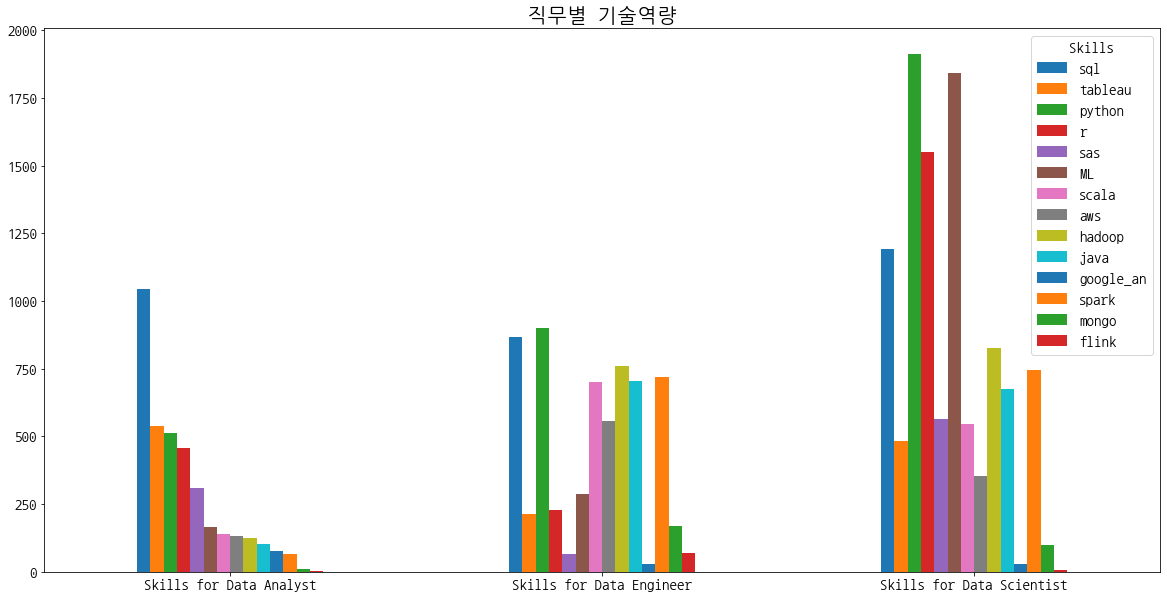

In [88]:
top_skill.plot(kind='bar',figsize=(20,10))
plt.xticks(rotation='horizontal')
plt.title("직무별 기술역량",fontsize=20)
plt.show()

In [89]:
sizes1 =[556,958,158,268,459,109,445,287,80,136,135,1,23,65]
sizes2 =[1818,1560,565,1266,1249,1003,610,477,883,849,765,52,179,56]
sizes3= [951,559,322,763,526,602,181,177,568,495,485,26,76,12]

In [129]:
top_skill_jobs = pd.DataFrame({'Job Level':['Entry Level','Mid Level','Senior Level'],
"Python":[556, 1818, 951],
"SQL":[958, 1560, 559],
"AWS":[158,565,322],
"ML":[268,1266,763],
"R":[459,1249,526],
"Hadoop":[109,1003,602],
"Tableau":[445,610,181],
"SAS":[287,477,177],
"Spark":[80,883,568],
"Java":[136,849,495],
"Scala":[135,765,485],
"Flink":[1,52,26],
"Mongo":[23,179,76],
"Google_an":[65,56,12] }
                              )
top_skill_jobs=top_skill_jobs.set_index("Job Level")
top_skill_jobs

,Python,SQL,AWS,ML,R,Hadoop,Tableau,SAS,Spark,Java,Scala,Flink,Mongo,Google_an
Job Level,,,,,,,,,,,,,,
Entry Level,556,958,158,268,459,109,445,287,80,136,135,1,23,65
Mid Level,1818,1560,565,1266,1249,1003,610,477,883,849,765,52,179,56
Senior Level,951,559,322,763,526,602,181,177,568,495,485,26,76,12


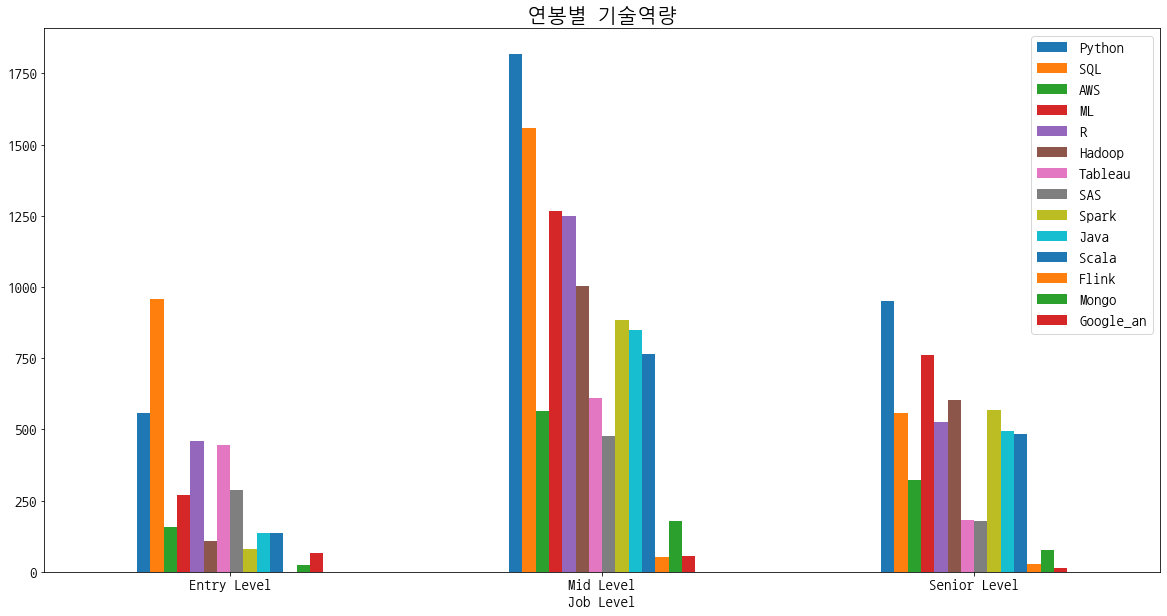

In [130]:
top_skill_jobs.plot(kind='bar',figsize=(20,10))
plt.xticks(rotation='horizontal')
plt.title("연봉별 기술역량",fontsize=20)
plt.plot()
plt.show()

In [92]:
top_skill_jobs

,python,sql,aws,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an
Job Level,,,,,,,,,,,,,,
Entry Level,556,958,158,268,459,109,445,287,80,136,135,1,23,65
Mid Level,1818,1560,565,1266,1249,1003,610,477,883,849,765,52,179,56
Senior Level,951,559,322,763,526,602,181,177,568,495,485,26,76,12


In [93]:
top_skill_jobs.loc['Entry Level', :].nlargest(6)

sql        958
python     556
r          459
tableau    445
sas        287
ML         268
Name: Entry Level, dtype: int64

In [94]:
top_skill_jobs.loc['Mid Level', :].nlargest(6)

python    1818
sql       1560
ML        1266
r         1249
hadoop    1003
spark      883
Name: Mid Level, dtype: int64

In [95]:
top_skill_jobs.loc['Senior Level', :].nlargest(6)

python    951
ML        763
hadoop    602
spark     568
sql       559
r         526
Name: Senior Level, dtype: int64

In [96]:
top_skill.loc['Skills for Data Analyst', :].nlargest(6)

Skills
sql        1044
tableau     538
python      512
r           456
sas         310
ML          166
Name: Skills for Data Analyst, dtype: int64

In [97]:
top_skill.loc['Skills for Data Engineer', :].nlargest(6)

Skills
python    901
sql       867
hadoop    761
spark     719
java      704
scala     700
Name: Skills for Data Engineer, dtype: int64

In [98]:
top_skill.loc['Skills for Data Scientist', :].nlargest(6)

Skills
python    1912
ML        1842
r         1550
sql       1193
hadoop     827
spark      745
Name: Skills for Data Scientist, dtype: int64

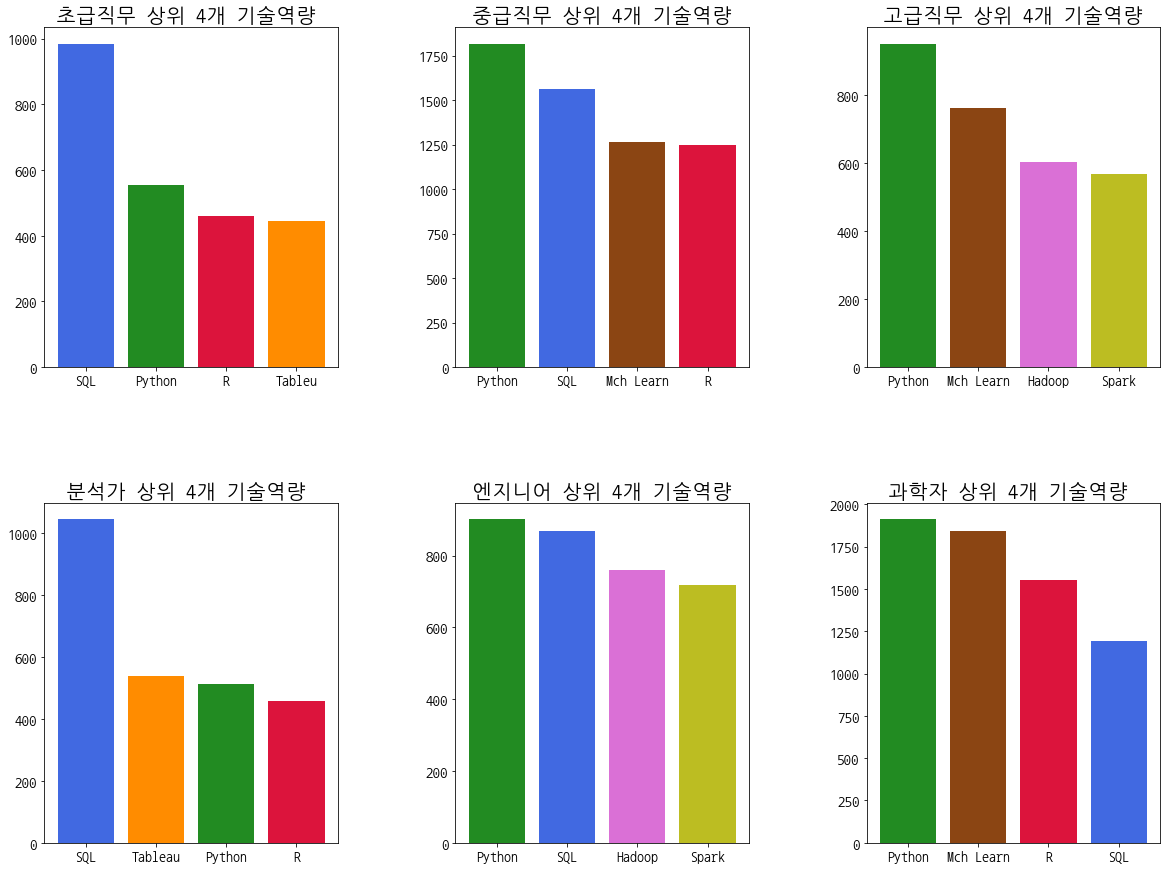

In [99]:
#plt.subplot(figsize=(20, 15))
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4 )
#’SQL’   ,  ‘Python’,   ‘R’,     ‘Tableu’, ‘Machine Learning’, Hadoop , Spark
#'royalblue’, 'limegreen’, 'crimson’, 'darkorange’,'saddlebrown’, 'orchid’,'tab:olive’
plt.subplot(2,3,1)
entry_skills=[985,556,459,445]
x1 = np.arange(len(entry_skills))
colors1 = ['royalblue', 'forestgreen', 'crimson', 'darkorange']
plt.bar(x1,entry_skills, color= colors1)
plt.xticks(x1, ['SQL','Python', 'R', 'Tableu'], fontsize = 14)
plt.title('초급직무 상위 4개 기술역량 ', fontsize = 20)
plt.subplot(2,3,2)
mid_skills=[1818,1560,1266,1249]
x2 = np.arange(len(mid_skills))
colors2=['forestgreen','royalblue','saddlebrown','crimson']
plt.bar(x1,mid_skills, color = colors2)
plt.xticks(x2, ['Python','SQL','Mch Learn', 'R'],fontsize = 14)
plt.title('중급직무 상위 4개 기술역량', fontsize = 20)
plt.subplot(2,3,3)
senior_skills=[951,761,602,568]
x2 = np.arange(len(senior_skills))
colors3=['forestgreen','saddlebrown','orchid','tab:olive']
plt.bar(x1,senior_skills, color = colors3)
plt.xticks(x2, ['Python','Mch Learn','Hadoop', 'Spark'],fontsize = 14)
plt.title('고급직무 상위 4개 기술역량', fontsize = 20)
plt.subplot(2,3,4)

analyst_skills=[1044,538,512,456]
x2 = np.arange(len(analyst_skills))
colors4=['royalblue','darkorange','forestgreen','crimson']
plt.bar(x1,analyst_skills,color=colors4)
plt.xticks(x2, ['SQL','Tableau','Python', 'R'],fontsize = 14)
plt.title('분석가 상위 4개 기술역량 ', fontsize = 20)
plt.subplot(2,3,5)
engineer_skills=[901,867,761,719]
x2 = np.arange(len(engineer_skills))
colors5=['forestgreen','royalblue','orchid','tab:olive']
plt.bar(x1,engineer_skills,color=colors5)
plt.xticks(x2, ['Python','SQL','Hadoop','Spark'],fontsize = 14)
plt.title('엔지니어 상위 4개 기술역량', fontsize = 20)
plt.subplot(2,3,6)
scientist_skills=[1912,1842,1550,1193]
x2 = np.arange(len(scientist_skills))
colors6=['forestgreen','saddlebrown','crimson','royalblue']
plt.bar(x1,scientist_skills,color=colors6)
plt.xticks(x2, ['Python','Mch Learn','R','SQL'],fontsize = 14)
plt.title('과학자 상위 4개 기술역량 ', fontsize = 20)
plt.show()

In [100]:
indeed.head(5)

,index,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Description,Location,Company_Revenue,Company_Employees,python,sql,aws,excel,ML,r,hadoop,tableau,sas,spark,java,scala,flink,mongo,google_an,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,...,MA,MD,MI,MN,MO,MT,NC,ND,NE,NH,NM,NJ,NY,NV,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Degree.1,m,p,both
0,0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,"[<p><b>POSITION SUMMARY</b></p>, <p>The Busine...",MO,More than $10B (USD),"10,000+",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,M,1,0,0
1,1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,"[<p><b>What do we need?</b></p>, <ul><li>You t...",TX,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,P,0,1,0
2,2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,"[<ul><li>Validate, analyze, and conduct statis...",OR,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,0,0,0
3,3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,na,0,0,0
4,4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,[<ul><li>Assist in consultations with business...,TX,0,"Less than 10,000",0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,na,0,0,0


### 데이터 사이언스 석사 / 박사

In [101]:
entrySeM = ((indeed.Queried_Salary == '<80000') | (indeed.Queried_Salary =='80000-99999')) & (indeed.m == 1) & (indeed.Job_Type == 'data_scientist')
entrySeM.value_counts()

False    5673
True       42
dtype: int64

In [102]:
entrySmM = ((indeed.Queried_Salary == '100000-119999') | (indeed.Queried_Salary =='120000-139999')) & (indeed.m == 1) & (indeed.Job_Type == 'data_scientist')
entrySmM.value_counts()

False    5459
True      256
dtype: int64

In [103]:
entrySpM = ((indeed.Queried_Salary == '140000-159999') | (indeed.Queried_Salary =='>160000')) & (indeed.m == 1) & (indeed.Job_Type == 'data_scientist')
entrySpM.value_counts()

False    5641
True       74
dtype: int64

In [104]:
entrySeP = ((indeed.Queried_Salary == '<80000') | (indeed.Queried_Salary =='80000-99999')) & (indeed.p == 1) & (indeed.Job_Type == 'data_scientist')
entrySeP.value_counts()

False    5627
True       88
dtype: int64

In [105]:
entrySmP = ((indeed.Queried_Salary == '100000-119999') | (indeed.Queried_Salary =='120000-139999')) & (indeed.p == 1) & (indeed.Job_Type == 'data_scientist')
entrySmP.value_counts()

False    5300
True      415
dtype: int64

In [106]:
entrySpP = ((indeed.Queried_Salary == '140000-159999') | (indeed.Queried_Salary =='>160000')) & (indeed.p == 1) & (indeed.Job_Type == 'data_scientist')
entrySpP.value_counts()

False    5343
True      372
dtype: int64

### 데이터 엔지니어 석사 / 박사

In [107]:
entryEeM = ((indeed.Queried_Salary == '<80000') | (indeed.Queried_Salary =='80000-99999')) & (indeed.m == 1) & (indeed.Job_Type == 'data_engineer')
entryEeM.value_counts()

False    5694
True       21
dtype: int64

In [108]:
entryEmM = ((indeed.Queried_Salary == '100000-119999') | (indeed.Queried_Salary =='120000-139999')) & (indeed.m == 1) & (indeed.Job_Type == 'data_engineer')
entryEmM.value_counts()

False    5554
True      161
dtype: int64

In [109]:
entryEpM = ((indeed.Queried_Salary == '140000-159999') | (indeed.Queried_Salary =='>160000')) & (indeed.m == 1) & (indeed.Job_Type == 'data_engineer')
entryEpM.value_counts()

False    5644
True       71
dtype: int64

In [110]:
entryEeP = ((indeed.Queried_Salary == '<80000') | (indeed.Queried_Salary =='80000-99999')) & (indeed.p == 1) & (indeed.Job_Type == 'data_engineer')
entryEmP = ((indeed.Queried_Salary == '100000-119999') | (indeed.Queried_Salary =='120000-139999')) & (indeed.p == 1) & (indeed.Job_Type == 'data_engineer')
entryEpP = ((indeed.Queried_Salary == '140000-159999') | (indeed.Queried_Salary =='>160000')) & (indeed.p == 1) & (indeed.Job_Type == 'data_engineer')

In [111]:
entryEeP.value_counts()

False    5700
True       15
dtype: int64

In [112]:
entryEmP.value_counts()

False    5668
True       47
dtype: int64

In [113]:
entryEpP.value_counts()

False    5694
True       21
dtype: int64

## 데이터분석가 석/박사

In [114]:
entryAeM = ((indeed.Queried_Salary == '<80000') | (indeed.Queried_Salary =='80000-99999')) & (indeed.m == 1) & (indeed.Job_Type == 'data_analyst')
entryAmM = ((indeed.Queried_Salary == '100000-119999') | (indeed.Queried_Salary =='120000-139999')) & (indeed.m == 1) & (indeed.Job_Type == 'data_analyst')
entryApM = ((indeed.Queried_Salary == '140000-159999') | (indeed.Queried_Salary =='>160000')) & (indeed.m == 1) & (indeed.Job_Type == 'data_analyst')

In [115]:
entryAeP = ((indeed.Queried_Salary == '<80000') | (indeed.Queried_Salary =='80000-99999')) & (indeed.p == 1) & (indeed.Job_Type == 'data_analyst')
entryAmP = ((indeed.Queried_Salary == '100000-119999') | (indeed.Queried_Salary =='120000-139999')) & (indeed.p == 1) & (indeed.Job_Type == 'data_analyst')
entryApP = ((indeed.Queried_Salary == '140000-159999') | (indeed.Queried_Salary =='>160000')) & (indeed.p == 1) & (indeed.Job_Type == 'data_analyst')

In [116]:
entryAeM.value_counts()

False    5487
True      228
dtype: int64

In [117]:
entryAmM.value_counts()

False    5640
True       75
dtype: int64

In [118]:
entryApM.value_counts()

False    5683
True       32
dtype: int64

In [119]:
entryAeP.value_counts()

False    5676
True       39
dtype: int64

In [120]:
entryAmP.value_counts()

False    5696
True       19
dtype: int64

In [121]:
entryApP.value_counts()

False    5698
True       17
dtype: int64